### PCA Technique

Problem Starement: Apply the PCA Technique to the Following Dataset
    
Dataset --> PCA.csv

In [1]:
#Importing the Required Libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/winequality-red.csv")
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Checking the Shape
Dataset.shape

(1599, 12)

In [4]:
#Converting into numpy array -- as scale() requires array format
array = Dataset.values
#Normalizing the numerical data  by using scale()
Normal = scale(array)
Normal

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

#### PCA

In [5]:
#Creating PCA() instance, n_components = 12 --> Creating 12 PC's. --> As There are 12 Dimension in the Dataset
#(It is not necessary to give n_components as pca will create itself based on the dimension present)
pca = PCA(n_components = 12)
pca_values = pca.fit_transform(Normal)

In [6]:
#Pca_values/scores
pca_values

array([[-1.77944158,  1.15730315, -1.38658056, ...,  0.07311218,
        -0.2629366 ,  0.0483618 ],
       [-1.00418467,  2.07183784,  0.00775877, ..., -0.56573584,
         0.04878357, -0.13956516],
       [-0.91578319,  1.3934342 , -0.69928641, ..., -0.16206469,
        -0.19914047, -0.120391  ],
       ...,
       [-1.36626511, -0.51756099,  1.25069637, ..., -0.7528537 ,
         0.23526637, -0.4022917 ],
       [-2.36714672,  0.70354479,  0.89948219, ..., -0.72345329,
         0.73725311,  0.03618731],
       [-0.28877628, -1.24084585,  1.21809517, ...,  0.30587722,
         0.77724576, -0.44916727]])

Inference: pca_values Gives the 12 PC's

In [7]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

Inference: Above Are the Variance of all 12 PC's, 1st PC Contain the Maximum variance (Maximum Information) i.e. 0.26 = 26%

In [8]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 26.01,  44.69,  58.71,  68.84,  76.95,  82.47,  87.62,  91.84,
        95.27,  98.  ,  99.5 , 100.  ])

Inference: Above Are the Cumulative Variance of all 12 PC's, 1st PC Contain the Maximum variance (Maximum Information) i.e. 26.01, next PC contain 44.69 and So on till all 12 PC contains 100% Cumulative Variance

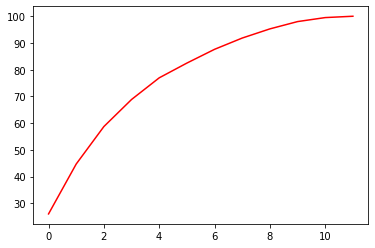

In [9]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

Inference: The Above Plot is of Cumulative Variance 1st PC with around 26%, 2nd PC Around 44% and so on till 12th PC overall 100%

In [10]:
#Eigen vectors
pca.components_

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878],
       [-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
         0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
        -0.50270865, -0.47316621],
       [-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
         0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
         0.22497138,  0.22336929],
       [-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
        -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
        -0.09170143, -0.03666923],
       [-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
        -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.21483493,
         0.25972635,  0.13758414],
       [ 0.0555313 ,  0.297287  ,  0.13663328,  0.10931059,  0.33733656,
        -0.04264807,  

Inference: The Above is the Eigen Vector for the Given Dataset

In [11]:
#Fetching / Indexing pca1
pca_values[:,0:1]

array([[-1.77944158],
       [-1.00418467],
       [-0.91578319],
       ...,
       [-1.36626511],
       [-2.36714672],
       [-0.28877628]])

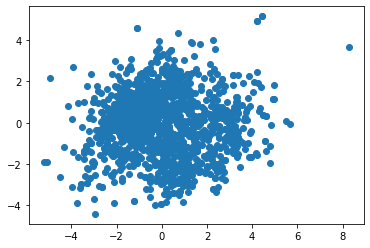

In [12]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
# = pca_values[:2:3]
plt.scatter(x,y)

In [13]:
#Concatinating PC1 & PC2 with the 'Univ' Name Colums
finalDf = pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2'])
finalDf.head()

,pc1,pc2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
